In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as ms
import plotly.express as px
import plotly.graph_objs as go

In [4]:
#Leemos los csv con los que trabajaremos
Peliculas = pd.read_csv(r'Peliculas-F.csv')

In [5]:
#Nos damos una idea de como estan compuesto los csv
Peliculas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22998 entries, 0 to 22997
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   show_id        22998 non-null  object 
 1   type           22998 non-null  object 
 2   title          22998 non-null  object 
 3   director       14739 non-null  object 
 4   cast           17677 non-null  object 
 5   country        11499 non-null  object 
 6   date_added     13444 non-null  object 
 7   release_year   22998 non-null  int64  
 8   rating         22998 non-null  object 
 9   duration       22516 non-null  object 
 10  listed_in      22998 non-null  object 
 11  description    22994 non-null  object 
 12  id             22998 non-null  object 
 13  duration_int   22516 non-null  float64
 14  duration_type  22516 non-null  object 
 15  score          22998 non-null  float64
dtypes: float64(2), int64(1), object(13)
memory usage: 2.8+ MB


In [6]:
#Revisamos si tenemos valores nulos
Peliculas.isna().sum()


show_id              0
type                 0
title                0
director          8259
cast              5321
country          11499
date_added        9554
release_year         0
rating               0
duration           482
listed_in            0
description          4
id                   0
duration_int       482
duration_type      482
score                0
dtype: int64

Tenemos valores nulos en 8 columnas

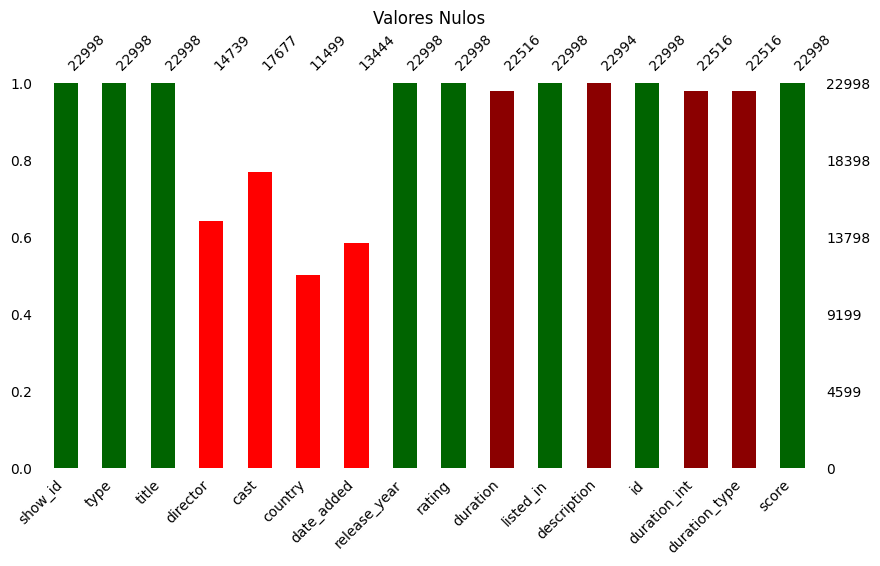

In [7]:
#Ahora visualizaremos estos valores nulos
colores = ['darkgreen','darkgreen','darkgreen','red','red','red','red','darkgreen','darkgreen','darkred','darkgreen','darkred','darkgreen','darkred','darkred','darkgreen']
ms.bar(Peliculas,fontsize=10,color=colores,figsize =(10,5))
plt.title('Valores Nulos')
plt.show()

Faltan valores en varias columnas, un total de 8, pero las mas significativas son las columnas: Director, Cast, Country y Date_added, donde al rededor del 50 y 30 porciento de sus valores son nulos.

In [8]:
#Cantidad de Movies vs tv shows

fig = px.histogram(Peliculas,x='type',template='plotly_dark',title='Tipo de Programas')
fig.update_layout(bargap=0.1)
fig.show()

Podemos ver como en su totalidad hay muchas mas movies que tv shows

In [9]:
#Distribucin del Score
fig = px.histogram(Peliculas,x='score',template='plotly_dark',title='Score')
fig.update_layout(bargap=0.1)
fig.show()

Aca podemos ver como al haber calculado el score utilizando el promedio, el mismo creo un distribucion gausiana.
El rango de valores es bastante reducido.

Text(0.5, 1.0, 'Tipo de Contenido por Año')

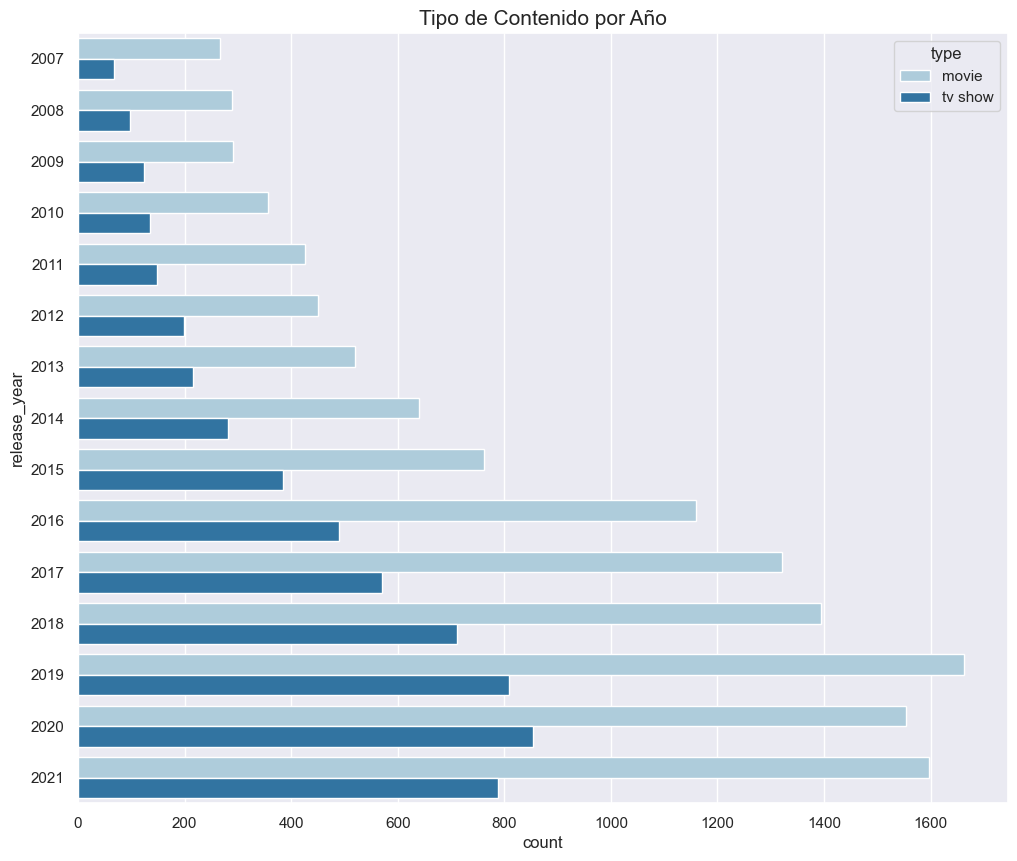

In [10]:

#Tipo de contenido por año los ultimos 15 años
plt.figure(figsize=(12,10))
sns.set(style='darkgrid')
sns.countplot(y='release_year',data=Peliculas,palette='Paired',order=Peliculas['release_year'].value_counts().index[0:15].sort_values(),hue=Peliculas['type'])
plt.title('Tipo de Contenido por Año', fontsize= 15 )

Aca podemos ver como cada tipo de contenido fue creciendo por año y como hubo siempre una mayor cantidad de movies que de tv shows. 
Utilize los ultimos 15 año para no saturar el grafico

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17580\4146616467.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



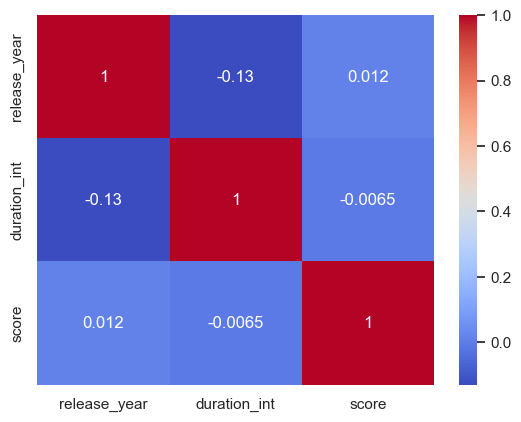

In [11]:
# Heatmap de correlaciones entre variables numéricas
sns.heatmap(Peliculas.corr(), cmap='coolwarm', annot=True)
plt.show()

Esta correlacion de variables realmente no nos da mucho con lo que trabajar, es decir, ahora sabemos que practicamente no se correlacionan estas variables.

In [12]:
#Dividiremos el df en dos, donde estudiaremos por separado las peliculas y las series o tv shows

df_movie = Peliculas[Peliculas['type'] == 'movie']
df_tv = Peliculas[Peliculas['type'] == 'tv show']

In [72]:
#Histograma para ver como se comporta la variable duration_int de las peliculas
fig = px.histogram(df_movie,x='duration_int',template='plotly_dark',title='Score')
fig.update_layout(bargap=0.1)
fig.show()

Podemos ver que en la distribucion de esta variable, la gran mayoria de peliculas duran alrededor de 90 minutos.
El rango del grafica es muy alto dado que algunas cuantas peliculas llegaron a durar entre 500 y 600 minutos

In [70]:
top20 = df_tv[['title','duration_int']].sort_values(by='duration_int',ascending=False)
top20 = top20[0:20]
top20

,title,duration_int
22460,survivor,34.0
8899,the simpsons,32.0
20885,house hunters,30.0
22715,the amazing race,29.0
20620,the ultimate fighter,29.0
11027,the amazing race,29.0
22875,bleach,26.0
21900,the only way is essex,25.0
19992,saturday night live,23.0
20107,law & order: special victims unit,23.0


In [71]:
#Grafico del Top 20 de series con mas temporadas
fig = px.bar(top20,x='title',y='duration_int',template='plotly_dark',title='Top 15 series con mas temporadas')
fig.update_layout(bargap=0.1)
fig.show()

El rango de valores que manejan las 15 series con mas temporadas se encuentra entre 15 y 35 temporadas.
Otra cosa interesante es que esto nos hace notar que las series 'The amazing race'y 'Survivor' lo tenemos repetidos en nuestro df, lo que quiere decir que o bien se dio la casualidad de que haya dos pares de series que se llamen igual o son errores humanos.